In [1]:
# Installing required libraries
!pip install torch
!pip install datasets
!pip install nltk
!pip install transformers
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install vaderSentiment
!pip install WordCloud

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [11]:
# Importing all the necessary libraries
import re
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from datasets import load_dataset
import time
from transformers import BertTokenizer, BertForSequenceClassification, DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
from google.colab import drive

import pandas as pd
import re
import time
import joblib
from datasets import load_dataset
from google.colab import drive
from wordcloud import WordCloud
from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt
import seaborn as sns

from nltk import pos_tag
from nltk.tokenize import word_tokenize


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Downloading necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Mounting Google Drive
drive.mount('/content/drive')

# Loading the dataset
dataset = load_dataset("ummagumm-a/reddit_posts_comments")
df = pd.DataFrame(dataset['train'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


EDA | Exploratory Data Analysis

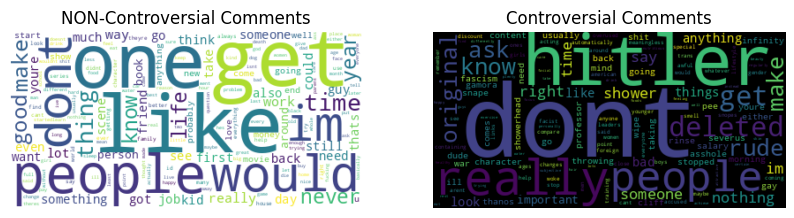

In [9]:
# Data Preprocessing for EDA
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.lower()

df['clean_comment'] = df['comment'].apply(clean_text)

# Tokenization and Removing Stop Words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['clean_comment'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_comment'].astype('U'))  # Converting text for Vectorizer
y = df['controversiality']  # Assuming 'controversiality' is the label

# Word Cloud for NON-Controversial and Controversial Comments
positive_comments = ' '.join(df[df['controversiality'] == 0]['clean_comment'])
negative_comments = ' '.join(df[df['controversiality'] == 1]['clean_comment'])

wordcloud_pos = WordCloud(stopwords=stop_words, background_color='white').generate(positive_comments)
wordcloud_neg = WordCloud(stopwords=stop_words, background_color='black').generate(negative_comments)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('NON-Controversial Comments')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Controversial Comments')
plt.show()

<ipython-input-15-0dad219cd20c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='controversiality', palette=['green', 'orange'])


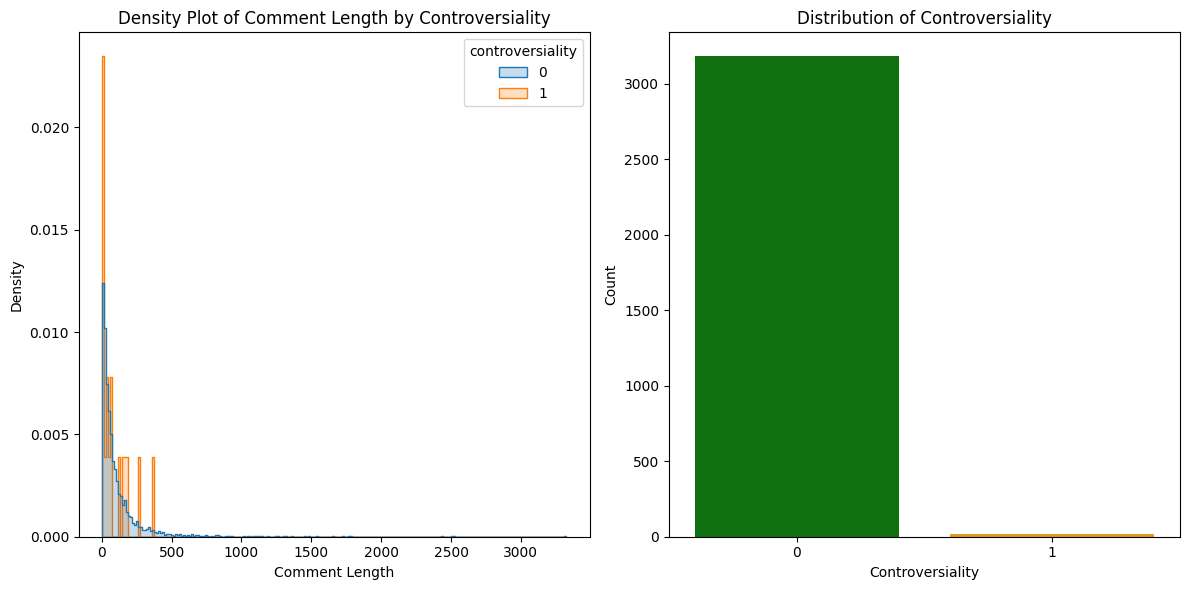

In [15]:
# Cleaning the comments and creating a new feature for comment length
df['comment'] = df['comment'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df['comment_length'] = df['comment'].str.len()

# Plotting
plt.figure(figsize=(12, 6))

# Histogram for comment length by controversiality
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='comment_length', hue='controversiality', element='step', stat='density', common_norm=False)
plt.title('Density Plot of Comment Length by Controversiality')
plt.xlabel('Comment Length')
plt.ylabel('Density')

# Histogram for controversiality count
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='controversiality', palette=['green', 'orange'])
plt.title('Distribution of Controversiality')
plt.xlabel('Controversiality')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


RANDOM FOREST + Count Vectorizer

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Model Evaluation:
Accuracy: 0.9693877551020408, Precision: 0.9899328859060402, Recall: 0.9470304975922953, F1 Score: 0.9680065627563577


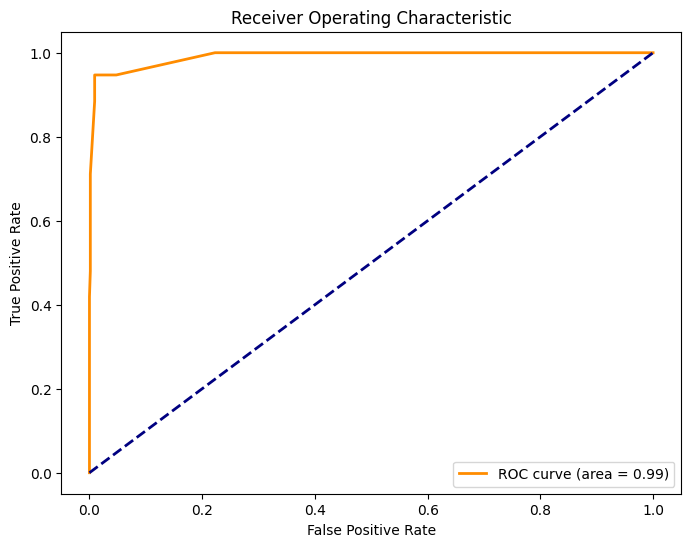

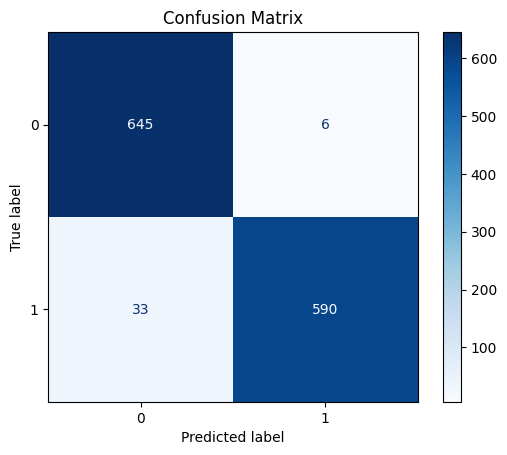

In [37]:
# Cleaning the comments
def clean_comment(comment):
    comment = re.sub(r'http\S+|www\S+|https\S+', '', comment, flags=re.MULTILINE)
    comment = re.sub(r'<.*?>', '', comment)
    comment = re.sub(r'[^a-zA-Z0-9\s]', '', comment)
    return comment.lower()

# Loading the dataset
dataset = load_dataset("ummagumm-a/reddit_posts_comments")
df = pd.DataFrame(dataset['train'])
df['comment'] = df['comment'].apply(clean_comment)

# Initializing CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_count = count_vectorizer.fit_transform(df['comment'])
y = df['controversiality']

# Handling class imbalance
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_count, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Saving the test data (I downloaded it to the system later to use it for test code. the test datasets are included in the zip file)
test_data_df = pd.DataFrame(X_test.toarray(), columns=count_vectorizer.get_feature_names_out())
test_data_df['label'] = y_test
test_data_df.to_csv('/content/drive/My Drive/Colab Notebooks/RF_TEST.csv', index=False)

# Defining parameter grid for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing RandomForest Classifier
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:")
print(grid_search.best_params_)

# Saving the best model (Again, as test datasets for each model, I have saved the best model parameters on the system and have included that in the zip folder for test code use)
best_rf_model = grid_search.best_estimator_
joblib.dump(best_rf_model, '/content/drive/My Drive/Colab Notebooks/RF_Model.pkl')

# Predicting class probabilities for ROC
y_pred_probs = best_rf_model.predict_proba(X_test)[:, 1]

# Predicting class labels for other metrics and CM
y_pred = best_rf_model.predict(X_test)

# Performance metrics
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print(f"Random Forest Model Evaluation:")
print(f"Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1 Score: {rf_f1}")

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


MULTINOMIAL NAIVE BAYES + COUNT VECTORIZER

In [5]:
# Function to clean comment data
def clean_comment(comment):
    comment = re.sub(r'http\S+|www\S+|https\S+', '', comment, flags=re.MULTILINE)
    comment = re.sub(r'<.*?>', '', comment)
    comment = re.sub(r'[^a-zA-Z0-9\s]', '', comment)
    return comment.lower()

# Loading the dataset
dataset = load_dataset("ummagumm-a/reddit_posts_comments")
df = pd.DataFrame(dataset['train'])
df['comment'] = df['comment'].apply(clean_comment)

# Applying Count Vectorization
count_vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_count = count_vectorizer.fit_transform(df['comment'])
y = df['controversiality']

# Handling Class Imbalance
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_count, y)

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Saving the test data
test_data_df = pd.DataFrame(X_test.toarray(), columns=count_vectorizer.get_feature_names_out())
test_data_df['label'] = y_test
test_data_df.to_csv('/content/drive/My Drive/Colab Notebooks/NB_TEST.csv', index=False)

# Defining parameter grid for grid search
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}

# Initialing Naive Bayes classifier
nb_model = MultinomialNB()

# Performing grid search with cross-validation
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Printing best parameters found
print("Best Parameters:")
print(grid_search.best_params_)

# Saving the best model
best_nb_model = grid_search.best_estimator_
joblib.dump(best_nb_model, '/content/drive/My Drive/Colab Notebooks/NB_Model.pkl')

# Evaluating the model
nb_y_pred = best_nb_model.predict(X_test)

# Calculating evaluation metrics
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred, zero_division=0)
nb_recall = recall_score(y_test, nb_y_pred, zero_division=0)
nb_f1 = f1_score(y_test, nb_y_pred, zero_division=0)

# Printing evaluation metrics
print("Naive Bayes Model Evaluation:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1 Score: {nb_f1}")
print(f"Fitting Time: {end_time - start_time:.2f} seconds")


Best Parameters:
{'alpha': 0.1, 'fit_prior': True}
Naive Bayes Model Evaluation:
Accuracy: 0.9489795918367347
Precision: 0.9055232558139535
Recall: 1.0
F1 Score: 0.9504195270785659
Fitting Time: 0.21 seconds


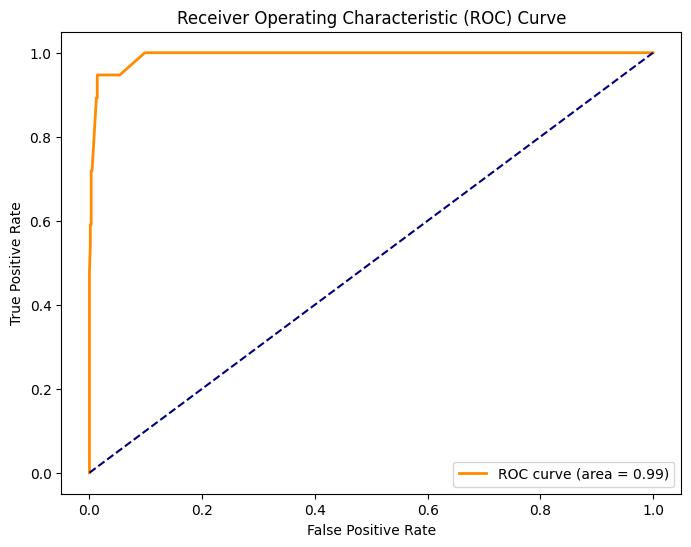

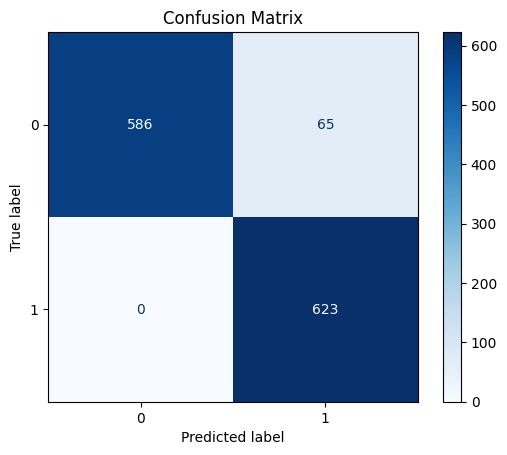

In [6]:
# Getting probability scores for the positive class
prob_scores = best_nb_model.predict_proba(X_test)[:, 1]

# Computing ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, prob_scores)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Computing confusion matrix
cm = confusion_matrix(y_test, nb_y_pred)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


LSTM | Long Short-Term Memory Model

In [29]:
# Loading the dataset
dataset = load_dataset("ummagumm-a/reddit_posts_comments")

# Function to clean comment data
def clean_comment(comment):
    comment = re.sub(r'http\S+|www\S+|https\S+', '', comment, flags=re.MULTILINE)
    comment = re.sub(r'<.*?>', '', comment)
    comment = re.sub(r'[^a-zA-Z0-9\s]', '', comment)
    comment = comment.lower()
    return comment

# Converting to pandas DataFrame
df = pd.DataFrame(dataset['train'])
X = df['comment']  # Features
y = df['controversiality']  # Labels

# Resampling the dataset
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X.values.reshape(-1, 1), y)

# Converting resampled data back to DataFrame for easier manipulation
resampled_df = pd.DataFrame(X_res, columns=['comment'])
resampled_df['controversiality'] = y_res

# Cleaning the 'comment' column
resampled_df['comment'] = resampled_df['comment'].apply(clean_comment)

# Initializing and fit the tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(resampled_df['comment'])

# Converting texts to sequences of integers
sequences = tokenizer.texts_to_sequences(resampled_df['comment'])

# Padding the sequences to ensure uniform length
max_length = max(len(x) for x in sequences)
X_pad = pad_sequences(sequences, maxlen=max_length)

# Preparing labels
y_array = y_res.to_numpy()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_array, test_size=0.2, random_state=42, stratify=y_array)

# Output for a few examples
print("First 5 training examples sequences:\n", X_train[:5])
print("\nTraining set distribution:\n", pd.Series(y_train).value_counts())
print("Test set distribution:\n", pd.Series(y_test).value_counts())

# Creating a DataFrame from the test data
test_df = pd.DataFrame(X_test, columns=[f'feature_{i+1}' for i in range(X_test.shape[1])])
test_df['label'] = y_test

# Specifying the path where you want to save the file in your Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/LSTM_TEST.csv'

# Saving the DataFrame to CSV
test_df.to_csv(file_path, index=False)

First 5 training examples sequences:
 [[   0    0    0 ...  227 1553 2520]
 [   0    0    0 ...  193   10   21]
 [   0    0    0 ...   98   16 2753]
 [   0    0    0 ...  481  319  373]
 [   0    0    0 ...    5   22  173]]

Training set distribution:
 0    2546
1    2546
Name: count, dtype: int64
Test set distribution:
 0    637
1    637
Name: count, dtype: int64


In [30]:

# Defining the LSTM model architecture
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_length),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(32),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model checkpoint to save the best model
checkpoint_path = '/content/drive/My Drive/Colab Notebooks/LSTM_Model.h5'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Early stopping to halt the training when the validation loss does not improve
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

# Training the model with the new callbacks
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1,
                    callbacks=[checkpoint, early_stopping])

# Loading the best model
model.load_weights(checkpoint_path)

# Predicting on test data
y_pred = (model.predict(X_test) > 0.5).astype('int32')

# Evaluating the model using sklearn's metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Printing metrics
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}, Accuracy: {accuracy}")


Epoch 1/10
64/64 [==============================] - ETA: 0s - loss: 0.4915 - accuracy: 0.7515
Epoch 1: val_loss improved from inf to 0.19247, saving model to /content/drive/My Drive/Colab Notebooks/LSTM_Model.h5
64/64 [==============================] - 105s 2s/step - loss: 0.4915 - accuracy: 0.7515 - val_loss: 0.1925 - val_accuracy: 0.8950
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64/64 [==============================] - ETA: 0s - loss: 0.0858 - accuracy: 0.9750
Epoch 2: val_loss improved from 0.19247 to 0.01940, saving model to /content/drive/My Drive/Colab Notebooks/LSTM_Model.h5
64/64 [==============================] - 91s 1s/step - loss: 0.0858 - accuracy: 0.9750 - val_loss: 0.0194 - val_accuracy: 0.9971
Epoch 3/10
64/64 [==============================] - ETA: 0s - loss: 0.0266 - accuracy: 0.9958
Epoch 3: val_loss improved from 0.01940 to 0.01780, saving model to /content/drive/My Drive/Colab Notebooks/LSTM_Model.h5
64/64 [==============================] - 95s 1s/step - loss: 0.0266 - accuracy: 0.9958 - val_loss: 0.0178 - val_accuracy: 0.9961
Epoch 4/10
64/64 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9968
Epoch 4: val_loss improved from 0.01780 to 0.01714, saving model to /content/drive/My Drive/Colab Notebooks/LSTM_Model.h5
64/64 [==============================] - 92s 1s/step - loss: 0.0215 - accuracy: 0.9968 - val_loss: 0.0171

40/40 [==============================] - 6s 148ms/step


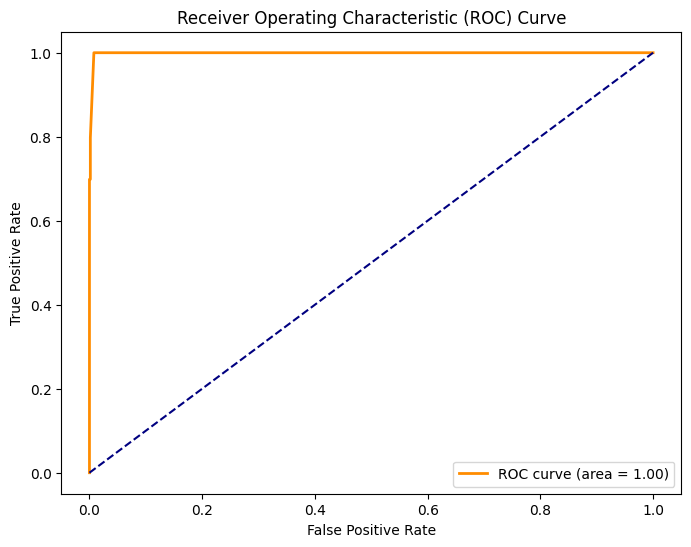

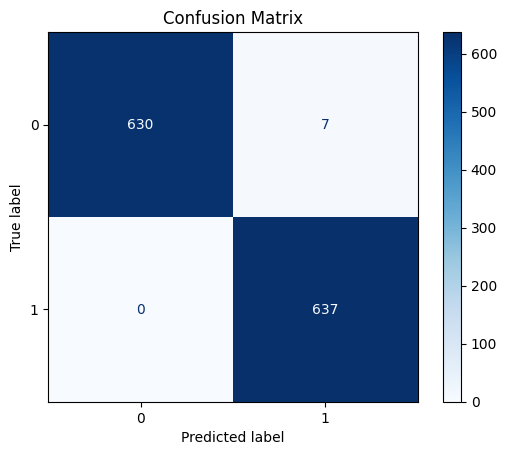

In [31]:
# Predicting probabilities on test data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype('int32')

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculating ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC curv
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Computing confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


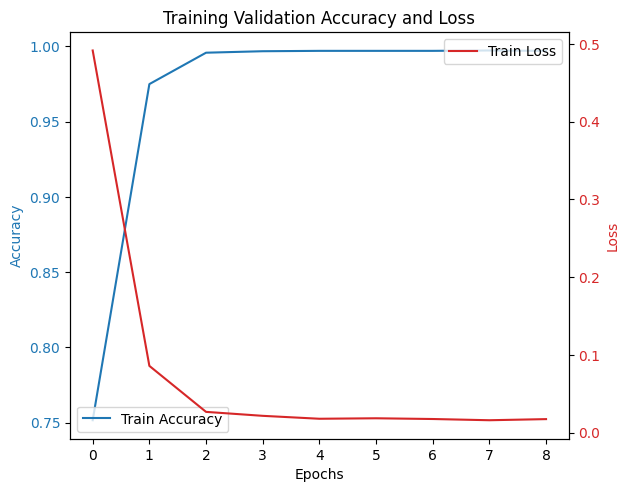

In [44]:
import matplotlib.pyplot as plt
# Plotting training & validation accuracy values
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(history.history['accuracy'], label='Train Accuracy', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='lower left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Loss', color=color)  # we already handled the x-label with ax1
ax2.plot(history.history['loss'], label='Train Loss', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Training Validation Accuracy and Loss')
plt.show()

SVM (SUPPORT VECTOR MACHINES) MODEL + POS-TAGGING

In [4]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# Loading the dataset
dataset = load_dataset("ummagumm-a/reddit_posts_comments")
df = pd.DataFrame(dataset['train'])

# Defining a function for cleaning and POS tagging
def clean_and_pos_tag(text):
    words = word_tokenize(text.lower())
    pos_tags = pos_tag(words)
    tagged_words = [f"{word}_{tag}" for word, tag in pos_tags]
    return ' '.join(tagged_words)

# Applying cleaning and POS tagging
df['comment_pos'] = df['comment'].apply(clean_and_pos_tag)

# Sampling the dataset if necessary
df_sampled = resample(df, n_samples=1000, random_state=42)

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(df_sampled['comment_pos'], df_sampled['controversiality'], test_size=0.2, random_state=42)

# Vectorizing text data
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# saving the vectorizers for further testset use
joblib.dump(vectorizer, '/content/drive/My Drive/Colab Notebooks/vectorizer.pkl')

# Creating a DataFrame from the test data
test_df = pd.DataFrame({'comment_pos': X_test, 'label': y_test})

# Specifying the path where you want to save the file in your Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/SVM_TEST.csv'

# Saving the DataFrame to CSV
test_df.to_csv(file_path, index=False)

print("Test data saved to CSV.")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Test data saved to CSV.


In [33]:
# Setup for the SVM and GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC(class_weight='balanced', probability=True)  # Ensure probability is enabled
clf = GridSearchCV(svc, parameters, cv=5)

# Training the model
clf.fit(X_train_vec, y_train)

# Printing the best parameters and the best cross-validation score
print("Best parameters:", clf.best_params_)
print("Best cross-validation score: {:.2f}".format(clf.best_score_))

# Saving the best model immediately after training
joblib.dump(clf.best_estimator_, '/content/drive/My Drive/Colab Notebooks/SVM_Model.pkl')
# Predicting probabilities on the test set
y_pred_probs = clf.predict_proba(X_test_vec)[:, 1]  # Probabilities of the positive class
y_pred = clf.predict(X_test_vec)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'C': 1, 'kernel': 'linear'}
Best cross-validation score: 0.99


In [34]:
# Predicting with the newly trained model
y_pred = clf.predict(X_test_vec)

# Calculating and print the revised performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Revised Accuracy: {accuracy:.4f}")
print(f"Revised Precision: {precision:.4f}")
print(f"Revised Recall: {recall:.4f}")
print(f"Revised F1-Score: {f1:.4f}")


Revised Accuracy: 0.9950
Revised Precision: 0.7500
Revised Recall: 1.0000
Revised F1-Score: 0.8571


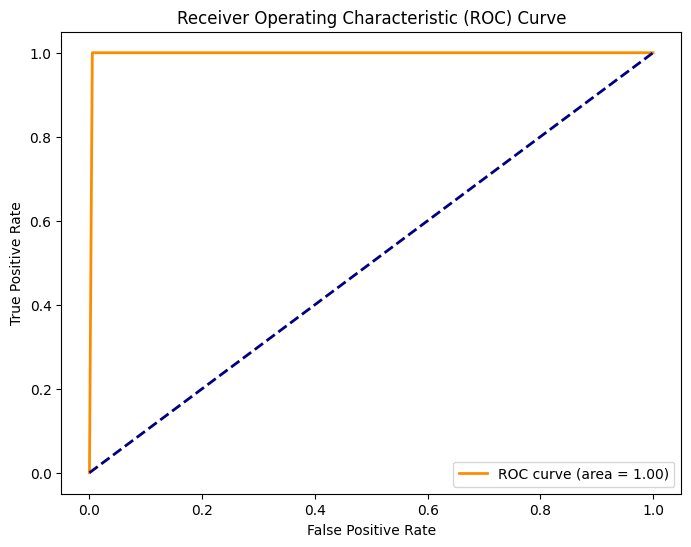

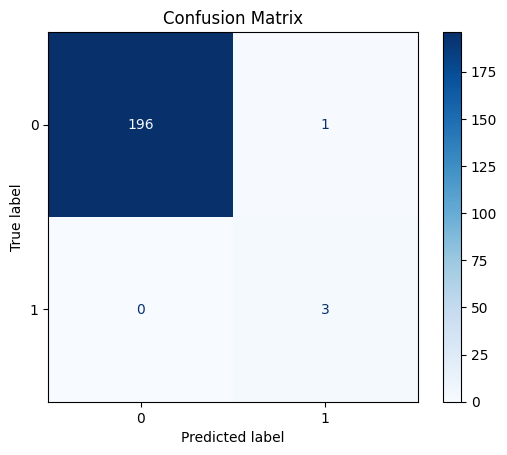

In [35]:
# Predicting probabilities on the test set
y_pred_probs = clf.predict_proba(X_test_vec)[:, 1]  # Probabilities of the positive class
y_pred = clf.predict(X_test_vec)

# Calculating ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Computing confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
